In [3]:
# import
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import pandas as pd
import csv

In [39]:
mtor = []
activity = []

with open('data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    for m in reader:
        mtor.append(Chem.MolFromSmiles(m['Smiles']))
        activity.append(float(m['pChEMBL Value']) if m['pChEMBL Value'] else 0)

In [41]:
suppl = Chem.SDMolSupplier('data/drugbank.sdf')
drugbank = [m for m in suppl if m]

[12:52:51] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[12:52:51] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[12:52:52] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:52:52] ERROR: Could not sanitize molecule ending on line 250947
[12:52:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[12:52:52] Explicit valence for atom # 17 O, 3, is greater than permitted
[12:52:52] ERROR: Could not sanitize molecule ending on line 258130
[12:52:52] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[12:52:52] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[12:52:52] ERROR: Could not sanitize molecule ending on line 261581
[12:52:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[12:52:52] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[12:52:52] ERROR: Could not 

In [16]:
# get organic drugbank
has_C = Chem.MolFromSmarts("[#6]")
org_drugbank = [drug for drug in drugbank if drug.HasSubstructMatch(has_C)]

In [17]:
from rdkit.Chem.Scaffolds import MurckoScaffold

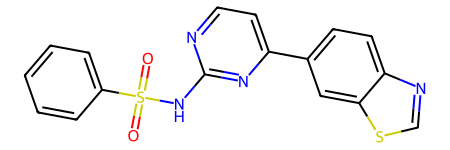

In [23]:
MurckoScaffold.GetScaffoldForMol(mtor[0])

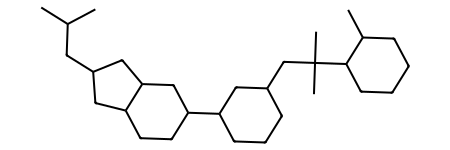

In [24]:
MurckoScaffold.MakeScaffoldGeneric(mtor[0])

In [28]:
def scaffold(mol):
    try:
        scaff1 = MurckoScaffold.GetScaffoldForMol(mol)
        scaff2 = MurckoScaffold.GetScaffoldForMol(MurckoScaffold.MakeScaffoldGeneric(mol))
    except ValueError:
        scaff1 = Chem.MolFromSmiles('N')
    try:
        scaff2 = MurckoScaffold.GetScaffoldForMol(MurckoScaffold.MakeScaffoldGeneric(mol))
    except ValueError:
        scaff2 = Chem.MolFromSmiles('N')

    return scaff1, scaff2

In [ ]:
scaffold(mtor[0])

In [26]:
from collections import defaultdict

In [29]:
scaffs_drugbank = defaultdict(list)
scaffs_mtor = defaultdict(list)
frames_drugbank = defaultdict(list)
frames_mtor = defaultdict(list)

In [30]:
for i, m in enumerate(org_drugbank):
    s,f = scaffold(m)
    scaffs_drugbank[Chem.MolToSmiles(s)].append(i)
    frames_drugbank[Chem.MolToSmiles(f)].append(i)

[12:46:04] Explicit valence for atom # 90 C, 6, is greater than permitted
[12:46:04] Explicit valence for atom # 90 C, 6, is greater than permitted
[12:46:04] Explicit valence for atom # 62 C, 6, is greater than permitted
[12:46:04] Explicit valence for atom # 62 C, 6, is greater than permitted
[12:46:04] Explicit valence for atom # 11 C, 8, is greater than permitted
[12:46:04] Explicit valence for atom # 11 C, 8, is greater than permitted
[12:46:04] Explicit valence for atom # 6 C, 6, is greater than permitted
[12:46:04] Explicit valence for atom # 6 C, 6, is greater than permitted
[12:46:07] Explicit valence for atom # 31 C, 6, is greater than permitted
[12:46:07] Explicit valence for atom # 31 C, 6, is greater than permitted
[12:46:07] Explicit valence for atom # 14 C, 10, is greater than permitted
[12:46:07] Explicit valence for atom # 14 C, 10, is greater than permitted
[12:46:08] Explicit valence for atom # 37 C, 6, is greater than permitted
[12:46:08] Explicit valence for atom #

In [31]:
frames_drugbank.keys()

dict_keys(['C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1', 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1', 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1', 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1', 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1', 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1', 'C1CCCCC1', 'N', 'C1CCC(CCC2CCC3CCCCC3C2)CC1', 'C1CCCC1', 'C1CCC2C(C1)CCC2C1CCCC1', '', 'C1CC2CCCC2C1', 'C1CCC(CCC2CCCC3CCCC32)CC1', 'C1CCC(CCCCCCCCCCCCCCCCCCC2CCCCC2)CC1', 'C1CCC2CC3CCCCC3CC2C1', 'C1CCC2CCCC2C1', 'C1CCC(CC2CCCC2)CC1', 'C(CCCC1CCC(C2CCCCC2)C1)CCCC1CCC(C2CCC3CCCCC32)C1', 'C1CCC2CCCCC2C1', 'C1CCC(C2CCCCC2C2CCCC2)CC1', 'C(CCCC1CCC2CCCC12)CCC1CCCCC1', 'C1CCC(CCCCC2CCCCC2)CC1', 'C1CCC2C(C1)CCC1C2CCC2C3CCCC3CC21', 'C(CCCCCCC1CCC2CCCCC12)CCCCCC1CCCCC1', 'C1CCC(C2CCCC2)CC1', 'C1CCC2(C1)CC1CCC2CC1', 'C1CCC(C2CCCCC3CCCCC32)CC1', 'C1CCC2C(C1)CC1

In [38]:
for i, m in enumerate(mtor):
    s,f = scaffold(m)
    scaffs_mtor[Chem.MolToSmiles(s)].append(i)
    frames_mtor[Chem.MolToSmiles(f)].append(i)

In [43]:
ds = list(scaffs_drugbank.items())
ds.sort(key = lambda i: -len(i[1]))
ms = list(scaffs_mtor.items())
ms.sort(key = lambda i: -len(i[1]))

df = list(frames_drugbank.items())
df.sort(key = lambda i: -len(i[1]))
mf = list(frames_mtor.items())
mf.sort(key = lambda i: -len(i[1]))

In [44]:
[(d[0], len(d[1])) for d in ds[:10]]

[('', 901),
 ('c1ccccc1', 637),
 ('C1CCOCC1', 131),
 ('c1ncc2ncn([C@H]3CCCO3)c2n1', 99),
 ('c1ccc2ccccc2c1', 49),
 ('c1ccc2[nH]ccc2c1', 47),
 ('c1ccncc1', 46),
 ('C1CCCCC1', 46),
 ('c1ccc(-c2ccccc2)cc1', 44),
 ('O=c1ccn([C@H]2CCCO2)c(=O)[nH]1', 39)]

In [45]:
[(d[0], len(d[1])) for d in ms[:10]]

[('c1ccc(-c2ccc3c(N4CCOCC4)nc(N4CCOCC4)nc3n2)cc1', 171),
 ('O=C(c1ccc(-c2ncncc2C#Cc2cccnc2)cc1)N1CCNCC1', 132),
 ('c1cncc(Nc2ncccc2-c2ncncn2)c1', 99),
 ('c1ccc(-c2n[nH]c3ncncc23)cc1', 79),
 ('c1cncc(Nc2ncc(CN3CCNCC3)cc2-c2ncncn2)c1', 67),
 ('O=C(c1ccc(-c2ncncc2C#Cc2cccnc2)cc1)N1CCCCC1', 56),
 ('C(#Cc1cncnc1N1CCCCC1)c1cccnc1', 55),
 ('c1ccc(Nc2nc3ccccc3n2-c2ncncn2)cc1', 54),
 ('C(#Cc1cncnc1-c1ccccc1)c1cccnc1', 53),
 ('c1ccc(-c2ccc3c(N4CCOCC4)ncnc3n2)cc1', 47)]

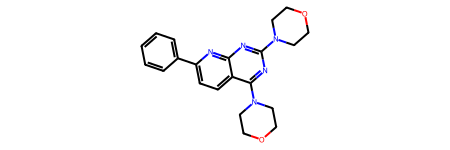

In [46]:
Chem.MolFromSmiles('c1ccc(-c2ccc3c(N4CCOCC4)nc(N4CCOCC4)nc3n2)cc1')

In [50]:
# unikatni scaffoldy
print(len(org_drugbank), len(mtor))
print(len(ds), len(ms))
print(len(df), len(mf))

7041 4596
3358 1526
1564 648


In [52]:
print(len(frames_drugbank['N']), len(frames_mtor['N']))

19 0


In [61]:
diverse = []
for f,id in mf:
    sub = []
    for i in id:
        mol = mtor[i]
        a = activity[i]
        sub.append((mol,a))
    sub.sort(key = lambda x: -x[1])
    diverse.append(sub[0])

In [62]:
diverse

[(<rdkit.Chem.rdchem.Mol at 0x1afaf960eb0>, 9.89),
 (<rdkit.Chem.rdchem.Mol at 0x1afaf989ee0>, 9.7),
 (<rdkit.Chem.rdchem.Mol at 0x1afb59227a0>, 9.21),
 (<rdkit.Chem.rdchem.Mol at 0x1afffb38820>, 9.22),
 (<rdkit.Chem.rdchem.Mol at 0x1afaf9929d0>, 7.5),
 (<rdkit.Chem.rdchem.Mol at 0x1afb5920eb0>, 6.81),
 (<rdkit.Chem.rdchem.Mol at 0x1afffb54740>, 8.52),
 (<rdkit.Chem.rdchem.Mol at 0x1afffce9d90>, 9.7),
 (<rdkit.Chem.rdchem.Mol at 0x1afffb338b0>, 9.52),
 (<rdkit.Chem.rdchem.Mol at 0x1afffce3840>, 9.4),
 (<rdkit.Chem.rdchem.Mol at 0x1afffb4dd20>, 9.29),
 (<rdkit.Chem.rdchem.Mol at 0x1afaf945540>, 9.52),
 (<rdkit.Chem.rdchem.Mol at 0x1afaf983ed0>, 9.57),
 (<rdkit.Chem.rdchem.Mol at 0x1afaf9892a0>, 9.46),
 (<rdkit.Chem.rdchem.Mol at 0x1afb590d460>, 8.22),
 (<rdkit.Chem.rdchem.Mol at 0x1afffce9f50>, 9.77),
 (<rdkit.Chem.rdchem.Mol at 0x1afffb3b610>, 8.52),
 (<rdkit.Chem.rdchem.Mol at 0x1afb5916420>, 8.7),
 (<rdkit.Chem.rdchem.Mol at 0x1afaf95c970>, 8.82),
 (<rdkit.Chem.rdchem.Mol at 0x1afffb

In [66]:
diverse.sort(key = lambda x: -x[1])

In [74]:
most = [mol for mol, activity in diverse[:20]]

In [64]:
from rdkit.Chem import Draw

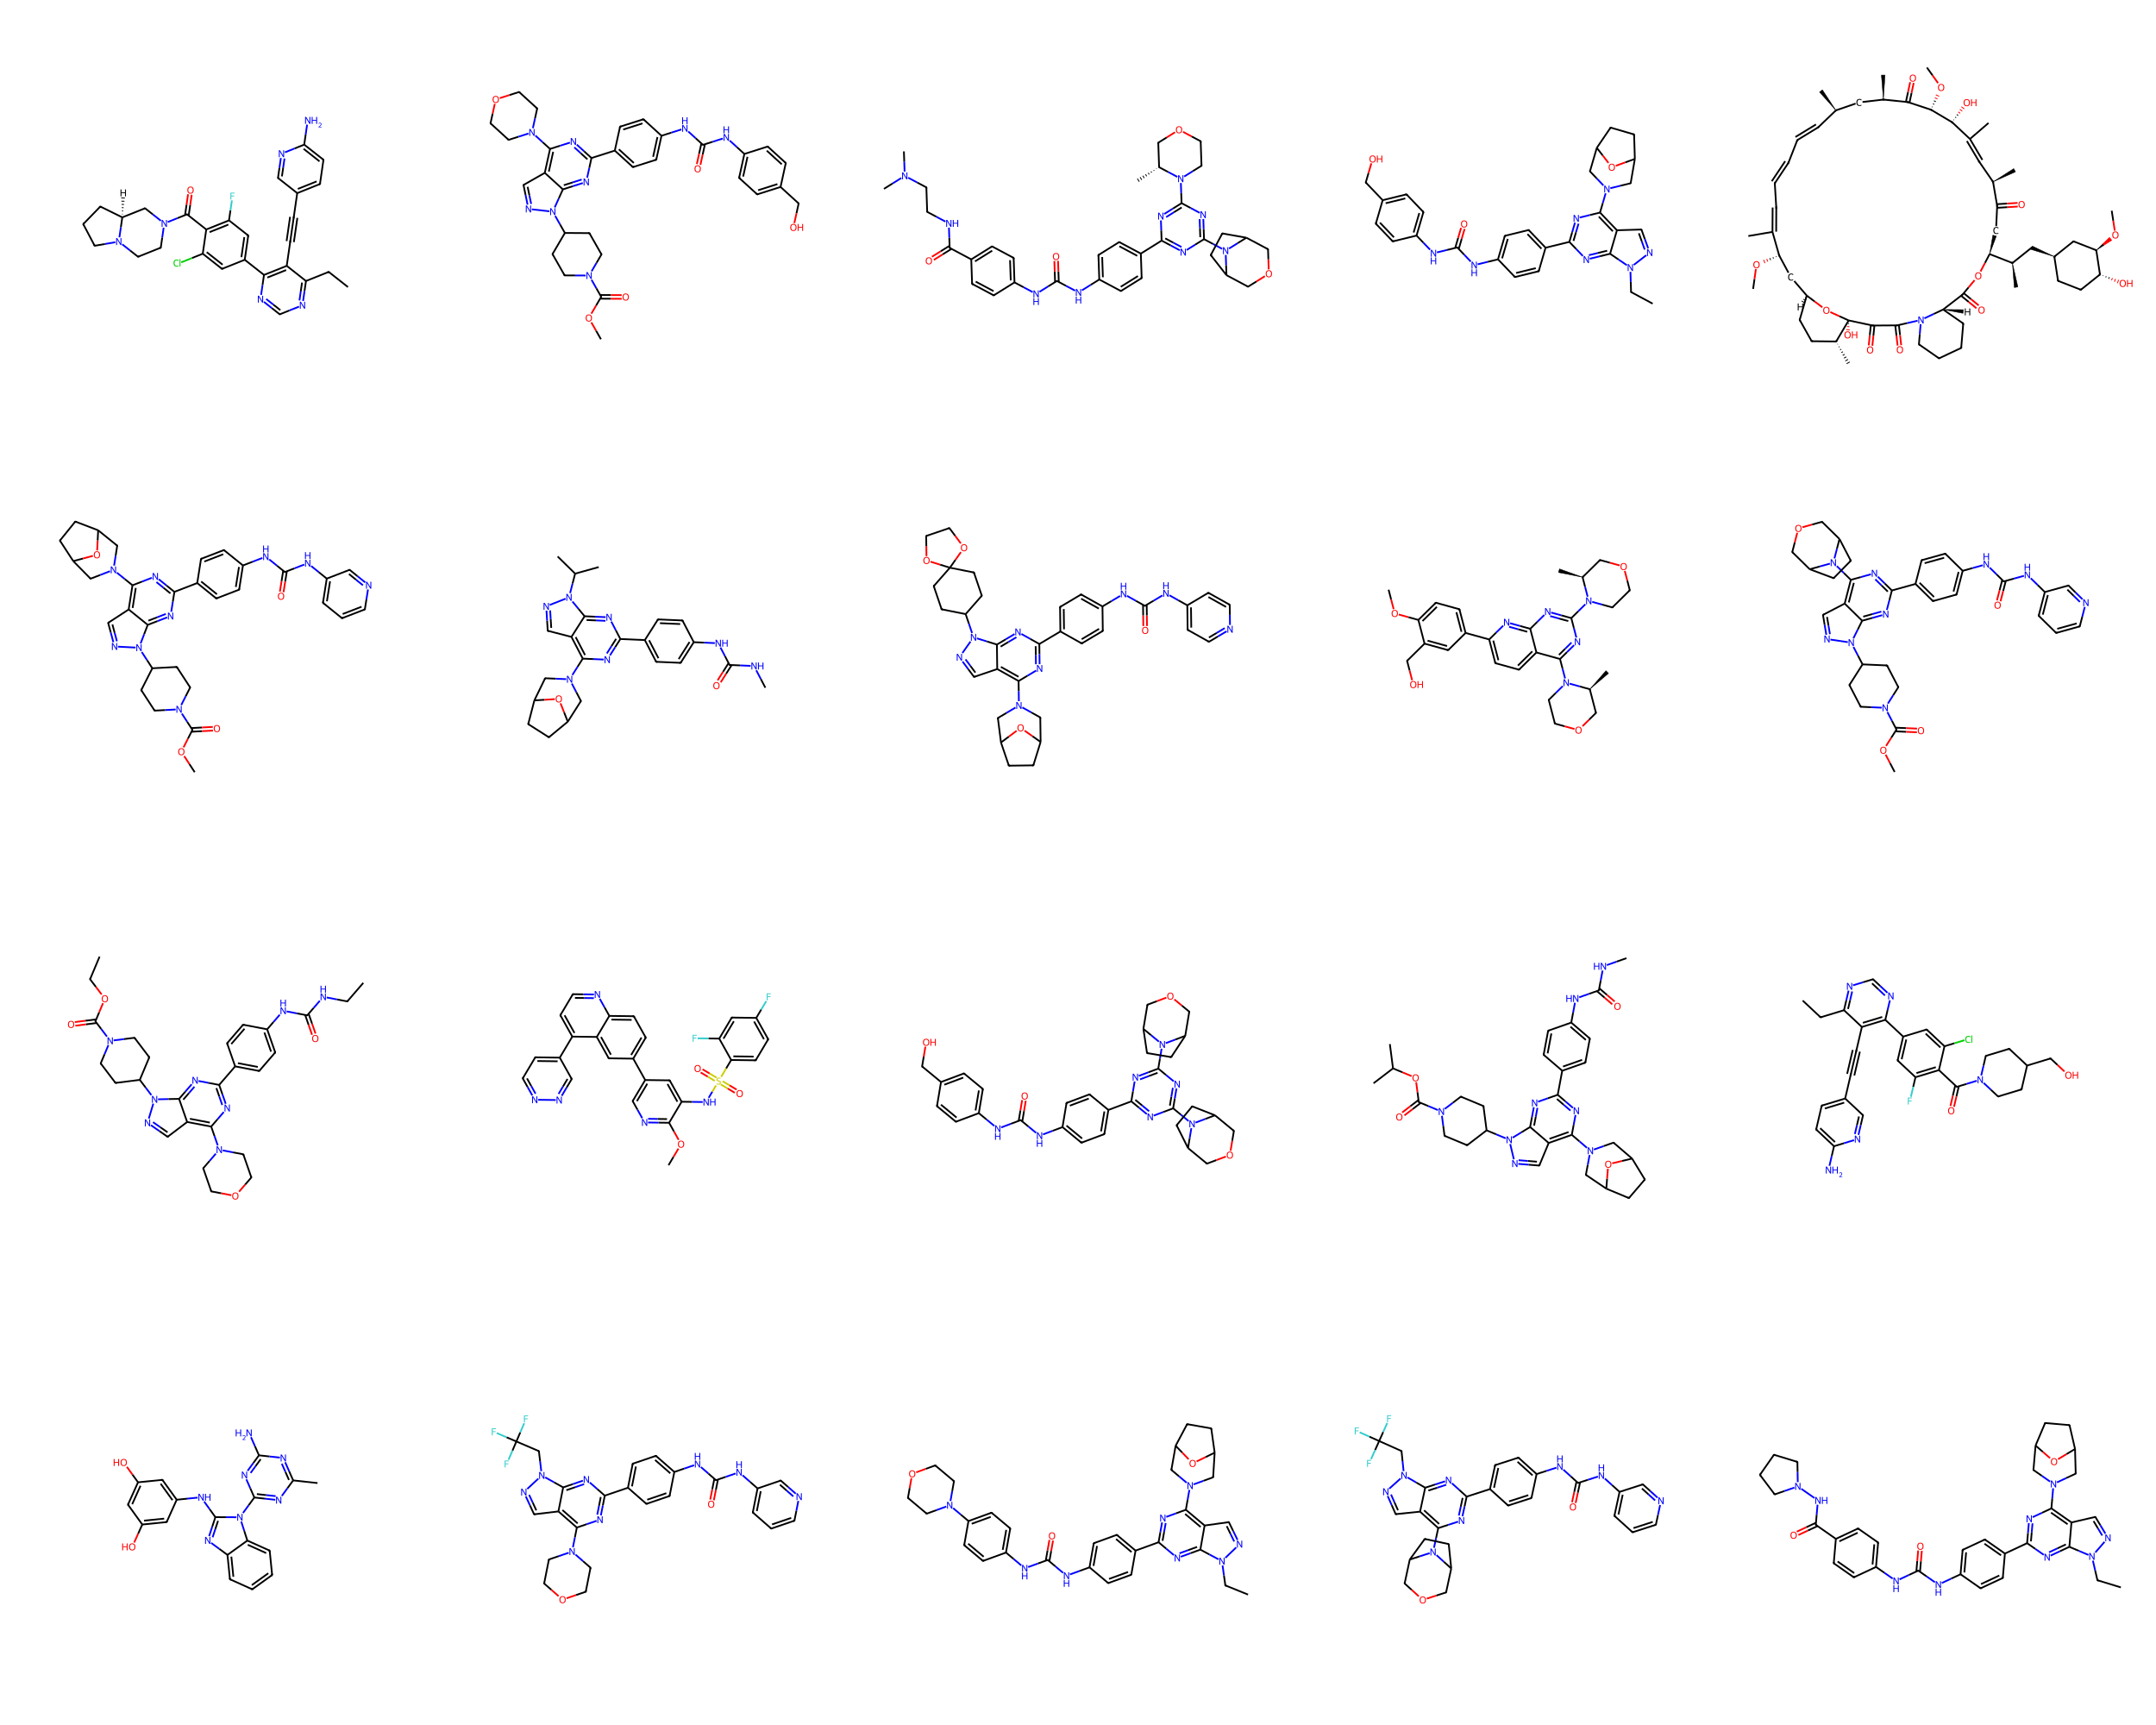

In [76]:
Draw.MolsToGridImage([drug for drug in most], molsPerRow = 5, subImgSize=(500,500))